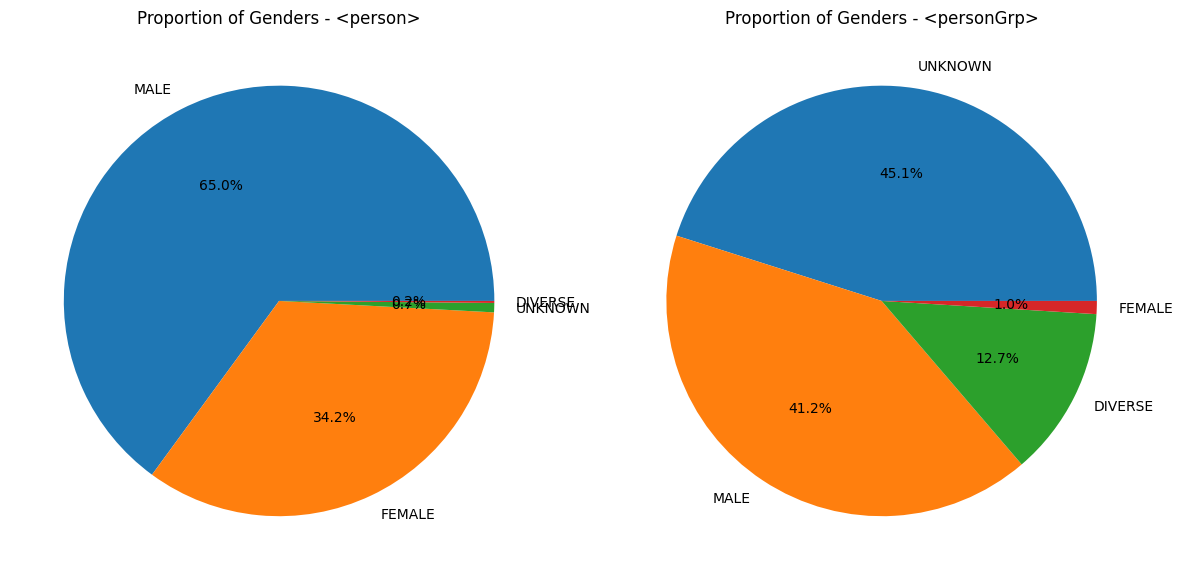

                 total  MALE FEMALE UNKNOWN DIVERSE  \
person_count      3304  2146   1130      23       5   
person_grp_count   102    42      1      46      13   

                                                         proportion  
person_count      {'MALE': 0.6495157384987893, 'FEMALE': 0.34200...  
person_grp_count  {'MALE': 0.4117647058823529, 'FEMALE': 0.00980...  


In [14]:
import os
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt

# Function to parse TEI files and calculate summary statistics
def parse_tei_files(folder_path):
    # Initialize counts for person and personGrp
    person_counts = {'total': 0, 'MALE': 0, 'FEMALE': 0, 'UNKNOWN': 0, 'DIVERSE': 0}
    person_grp_counts = {'total': 0, 'MALE': 0, 'FEMALE': 0, 'UNKNOWN': 0, 'DIVERSE': 0}

    # Namespace dictionary
    ns = {'tei': 'http://www.tei-c.org/ns/1.0'}

    # Iterate over files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith('.xml'):
            file_path = os.path.join(folder_path, filename)
            tree = ET.parse(file_path)
            root = tree.getroot()

            # Count person elements
            persons = root.findall('.//tei:person', namespaces=ns)
            for person in persons:
                person_counts['total'] += 1
                sex = person.get('sex')
                if sex in person_counts:
                    person_counts[sex] += 1
                else:
                    person_counts['UNKNOWN'] += 1  # If sex value is not recognized

            # Count personGrp elements
            person_grps = root.findall('.//tei:personGrp', namespaces=ns)
            for person_grp in person_grps:
                person_grp_counts['total'] += 1
                sex = person_grp.get('sex')
                if sex in person_grp_counts:
                    person_grp_counts[sex] += 1
                else:
                    person_grp_counts['UNKNOWN'] += 1  # If sex value is not recognized

    # Calculate proportion for counts of person elements
    total_persons = person_counts['total']
    proportion_person_counts = {sex: count / total_persons for sex, count in person_counts.items()}

    # Calculate proportion for counts of personGrp elements
    total_person_grps = person_grp_counts['total']
    proportion_person_grp_counts = {sex: count / total_person_grps for sex, count in person_grp_counts.items()}

    # Return summary statistics including proportion
    return {
        'person_count': {**person_counts, 'proportion': proportion_person_counts},
        'person_grp_count': {**person_grp_counts, 'proportion': proportion_person_grp_counts}
    }

# Path to the folder containing TEI files
folder_path = '../results'

# Parse TEI files and calculate summary statistics
summary_stats = parse_tei_files(folder_path)

# Convert summary statistics to DataFrame
summary_df = pd.DataFrame(summary_stats).T

# Save the DataFrame to CSV with "gender" in the filename
output_folder = 'output'
os.makedirs(output_folder, exist_ok=True)
output_file_csv = os.path.join(output_folder, 'summary_statistics_gender.csv')
summary_df.to_csv(output_file_csv)

# Plot the proportion of genders as pie charts
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Pie chart for <person> elements
person_proportions = summary_df.loc['person_count', 'proportion']
if 'total' in person_proportions:
    del person_proportions['total']
person_proportions_sorted = {k: v for k, v in sorted(person_proportions.items(), key=lambda item: item[1], reverse=True)}
axes[0].pie(person_proportions_sorted.values(), labels=person_proportions_sorted.keys(), autopct='%1.1f%%')
axes[0].set_title('Proportion of Genders - <person>')

# Pie chart for <personGrp> elements
person_grp_proportions = summary_df.loc['person_grp_count', 'proportion']
if 'total' in person_grp_proportions:
    del person_grp_proportions['total']
person_grp_proportions_sorted = {k: v for k, v in sorted(person_grp_proportions.items(), key=lambda item: item[1], reverse=True)}
axes[1].pie(person_grp_proportions_sorted.values(), labels=person_grp_proportions_sorted.keys(), autopct='%1.1f%%')
axes[1].set_title('Proportion of Genders - <personGrp>')

# Adjust layout
plt.tight_layout()

# Save the plot as a PNG file
output_file_png = os.path.join(output_folder, 'proportion_gender_pie_chart.png')
plt.savefig(output_file_png)

# Show the plot
plt.show()

# Display the DataFrame
print(summary_df)
